### 1 - Definição do problema

TODO

### 2 - Aquisição dos dados
Os dados utilizados para este trabalho foram retirados do Kaggle em https://www.kaggle.com/fedesoriano/heart-failure-prediction

### 3 - Data Wrangling
Importar as bibliotecas que vamos utilizar

In [132]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
sns.set()

Machine Learning algorithms

In [133]:
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

In [134]:
print("teste")

teste


## 3 - Data Wrangling

Nesta etapa vamos realizar as seguintes tarefas:
- Importar o dataset e fazer a limpeza de valores NaN (vazios)
- Renomear algumas colunas para melhor cmopreensão dos dados
- Converter nomenclaturas para melhor processamento de dados
- Criar uma nova coluna de faixas etárias para agrupar os diferentes individuos
- Criar novas colunas indicando se os niveis de colestrol, batimento cardiacos
são normais, acima ou abaixo da média


In [135]:
df = pd.read_csv('../data/heart.csv', sep=",", encoding="utf-8")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [137]:
df.drop_duplicates()
df.shape

(918, 12)

The dataset doesn't contain any nulls or duplicated values.
Now lets take a look at the non-metric columns

In [138]:
categorical = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

for value in categorical:
    print(df[value].value_counts(normalize=True), "\n")

M    0.78976
F    0.21024
Name: Sex, dtype: float64 

ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64 

Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64 

N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64 

Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64 



Since the column values seem to be specific categories, they can be converted in
numerical values to facilitate processing

In [139]:
enc = LabelEncoder()

# Gender: M -> 1 | F -> 0
enc.fit(df['Sex'])
df['Sex'] = enc.transform(df['Sex'])

# ChestPainType: ASY -> 0 | ATA -> 1 | NAP -> 2 | TA -> 3
enc.fit(df['ChestPainType'])
df['ChestPainType'] = enc.transform(df['ChestPainType'])

# RestingECG: LVH -> 0 | Normal -> 1 | ST -> 2
enc.fit(df['RestingECG'])
df['RestingECG'] = enc.transform(df['RestingECG'])

# ExerciseAngina: N -> 0 | Y -> 1
enc.fit(df['ExerciseAngina'])
df['ExerciseAngina'] = enc.transform(df['ExerciseAngina'])

# ST_Slope: Down -> 0 | Flat -> 1 | Up -> 2
enc.fit(df['ST_Slope'])
df['ST_Slope'] = enc.transform(df['ST_Slope'])

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


##### Faixas etárias

Vamos categorizar as idades dos individuos no dataset, agrupando-os por faixas etárias
para melhor analisar os resultados dos dados clínicos destes.

In [140]:
bins = np.arange(20, 100, 15)

df['age_category'] = np.digitize(df.Age, bins, right=True)

In [141]:
def f(row,col_name, min_value, high_value):
    if row[col_name] < min_value:
        val = 'Low'
    elif min_value < row[col_name] <= high_value:
        val = 'Normal'
    else:
        val = 'High'
    return val

##### Niveis de colestrol

O nivel de colestrol total para um adulto normal deve estar entre 125 a 200 md/dL
Assim vamos criar uma nova coluna onde os niveis de colestrol de cada individuo estão classificados
entre 'low', 'normal' e 'high'

In [142]:
df['Cholesterol_type'] = df.apply(lambda row: f(row,'Cholesterol', 125, 200) , axis=1)

##### Niveis pressão sanguinea em repouso

Valor ideal entre 90/60mmHg and 120/80mmHg

É considerada pressão elevada quando é igual ou acima de 140/90mmHg

É considerada pressão baixa quando está igual ou inferior a 90/60mmHg

In [143]:
df['RestingBP_type'] = df.apply(lambda row: f(row,'RestingBP', 90, 140) , axis=1)

Data set final após Data Wrangling.

In [144]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_category,Cholesterol_type,RestingBP_type
0,40,1,1,140,289,0,1,172,0,0.0,2,0,2,High,Normal
1,49,0,2,160,180,0,1,156,0,1.0,1,1,2,Normal,High
2,37,1,1,130,283,0,2,98,0,0.0,2,0,2,High,Normal
3,48,0,0,138,214,0,1,108,1,1.5,1,1,2,High,Normal
4,54,1,2,150,195,0,1,122,0,0.0,2,0,3,Normal,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1,2,High,Normal
914,68,1,0,144,193,1,1,141,0,3.4,1,1,4,Normal,High
915,57,1,0,130,131,0,1,115,1,1.2,1,1,3,Normal,Normal
916,57,0,1,130,236,0,0,174,0,0.0,1,1,3,High,Normal


## 4 - EDA

O EDA vai estar divido em três secções:
- Compreensão dos dados clínicos
- Análise por tabelas de valores (value_counts entre outros)
- Análise por gráficos

### Compriender os dados

#### Exame ECG
O ECG deteta os sinais elétricos do coração, ou seja, o tempo e a força dos impulsos elétricos
no coração. Cada contração do músculo cardíaco ou das válvulas cardíacas emite um impulso
elétrico comparável com um padrão considerado normal.

Por esse motivo, é o exame indicado para o despiste de arritmias cardíacas ou para a deteção
precoce de indicadores de isquemia cardíaca.

De notar que um resultado “normal” neste exame, não é suficiente para excluir uma doença
cardiovascular.


#### Angina
Angina is pain in the chest that comes on with exercise, stress, or other things that make the
heart work harder. It is an extremely common symptom of coronary artery disease,
which is caused by cholesterol-clogged coronary arteries.


#### Distribuição por género

<AxesSubplot:ylabel='Sex'>

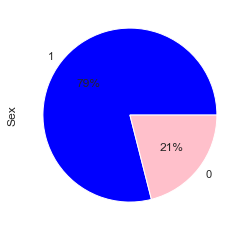

In [145]:
df['Sex'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["blue", "pink"])

Verifica-se que aproximadamente 4 em 5 individous neste conjunto de dados são homems

#### Registos de doenças de coração

<AxesSubplot:ylabel='HeartDisease'>

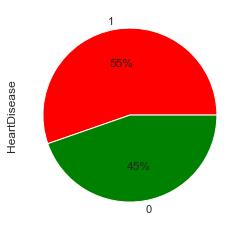

In [146]:
df['HeartDisease'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "green"])

O dataset aparenta ser quase balanceado neste aspeto, uma vez que existem quase tantos casos com
doença de coração como sem.

#### Distribuição por idades

<AxesSubplot:>

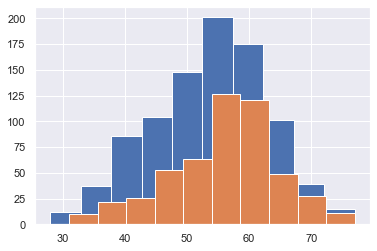

In [147]:
df_heart_disease = df[df.HeartDisease.apply(lambda x: x == 1)]
df['Age'].hist()
df_heart_disease['Age'].hist()

Ao analisar a distribuição de idades constata-se que a maior parte dos individuos tem entre 50 e 65 anos.

Ao comparar-se a distribuição das idades com as idades em que individuos sofrem de
doenças do coração verifica-se que esta é mais comum na faixa etária entre os 55 e 65 anos

Sex            0    1
age_category         
1              1    9
2             10  105
3             36  290
4              3   54


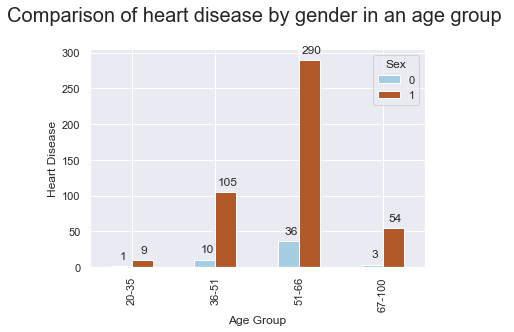

In [148]:
counts = df_heart_disease.groupby(['age_category', 'Sex']).Age.count().unstack()
print(counts)

ax = counts.plot(kind='bar',stacked = False, colormap = 'Paired')

for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points')

ax.set_xticklabels(['20-35','36-51','51-66','67-100'])
plt.xlabel ('Age Group')
plt.ylabel ('Heart Disease')
plt.title('Comparison of heart disease by gender in an age group \n',fontsize=20)
plt.show()

Filtrando os dados por individuos apenas com doença de coração, e tendo em conta a desproporção do género neste dataset
verifica-se que homems entre os 51 e os 66 anos sofrem ligeiramente mais com esta doença.

#### Niveis de colestrol

In [149]:
df['Cholesterol_type'].value_counts(normalize=True)

High      0.649237
Low       0.194989
Normal    0.155773
Name: Cholesterol_type, dtype: float64

(array([[596.,   0.,   0.,   0.,   0., 143.,   0.,   0.,   0., 179.],
        [297.,   0.,   0.,   0.,   0.,  54.,   0.,   0.,   0., 157.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 2 BarContainer objects>)

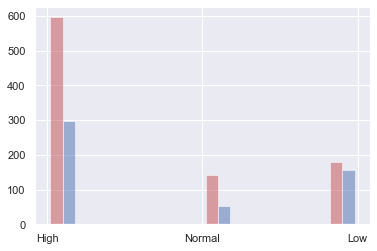

In [150]:
plt.hist([df['Cholesterol_type'], df_heart_disease['Cholesterol_type']], color=['r','b'], alpha=0.5)

In [151]:
# Percentage of cholesterol_type in individuals with heart disease
df_heart_disease['Cholesterol_type'].value_counts() / df['Cholesterol_type'].value_counts()

High      0.498322
Low       0.877095
Normal    0.377622
Name: Cholesterol_type, dtype: float64

Comparando a ocorrência de doença de coração com os niveis de colestrol, é possivel verificar
que 50% dos individuos com colestrol alto sofrem da mesma e que 88%
dos que apresentam niveis baixos também.

Esta analise demonstra também que em individuos com niveis normais de colestrol, a presença da doença
é de 38%, contudo, é importante notar, que 64% dos individuos neste dataset apresenta niveis
elevados de colestrol, o que pode comprometer a análise para outros niveis.

#### Pressão Sanguinea

In [152]:
print('Total\n',df['RestingBP_type'].value_counts(normalize=True), '\n')
print('Heart Disease\n',df_heart_disease['RestingBP_type'].value_counts())

Total
 Normal    0.758170
High      0.239651
Low       0.002179
Name: RestingBP_type, dtype: float64 

Heart Disease
 Normal    357
High      150
Low         1
Name: RestingBP_type, dtype: int64


(array([[696.,   0.,   0.,   0.,   0., 220.,   0.,   0.,   0.,   2.],
        [357.,   0.,   0.,   0.,   0., 150.,   0.,   0.,   0.,   1.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 2 BarContainer objects>)

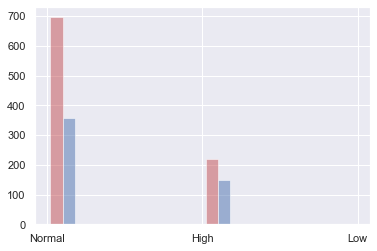

In [153]:
plt.hist([df['RestingBP_type'], df_heart_disease['RestingBP_type']], color=['r','b'], alpha=0.5)

In [154]:
# Percentage of cholesterol_type in individuals with heart disease
df_heart_disease['RestingBP_type'].value_counts() / df['RestingBP_type'].value_counts()

Normal    0.512931
High      0.681818
Low       0.500000
Name: RestingBP_type, dtype: float64

Comparando a ocorrência de doença de coração com os niveis de pressão sanguinea, é possivel verificar
que 68% dos individuos com pressão alta sofrem da mesma. Devido a este dataset não conter praticamente
nenhuns casos de pressão baixa, não é possivel tirar conclusões sobre esta.

Esta analise demonstra também que em individuos com niveis normais de pressão sanguinea, a presença da doença
é de 50%, contudo, é importante notar, que estes são dados sobre pressão sanguinea em repouso, que pode
para um quadro clinico, podem tirar grande disparidade da pressão sanguinea quando um individuo está em esforço.

#### Outliers

Metric features ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


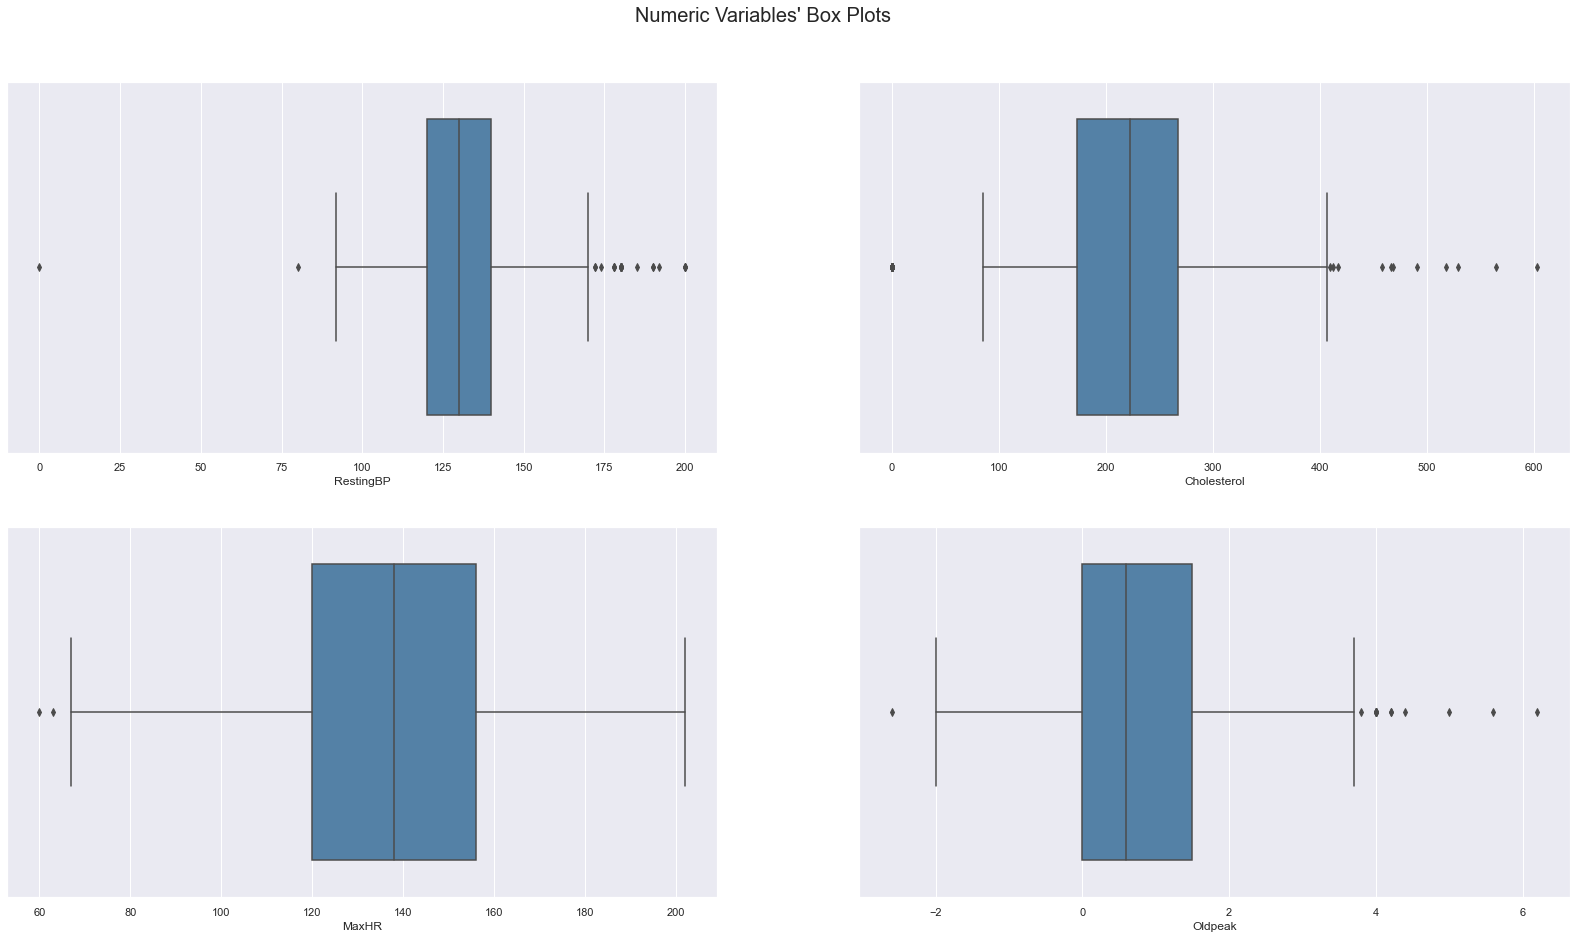

In [155]:
non_metric_features = ["Age", "Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina",
                       "ST_Slope", "HeartDisease", "Cholesterol_type", "RestingBP_type", "age_category"]
metric_features = df.columns.drop(non_metric_features).to_list()
print("Metric features", metric_features)

sns.set()
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(28, 15))

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax, color='steelblue')

title = "Numeric Variables' Box Plots"
plt.suptitle(title, y=0.95, fontsize=20)
plt.show()

Verifica-se a existência de alguns Outliars nas variaveis numéricas como nos dados da pressão sanguinea
e niveis de colestrol, contudo, a existência destes “outliars” pode estar correlacionada com a presença
de doença do coração, isto é, pode ser um fator que contribui para esta se manifestar.

Assim, estes “outliars” não serão removidos.

<AxesSubplot:>

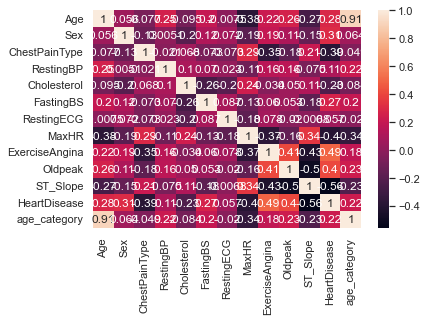

In [156]:
sns.heatmap(data=df.corr(), annot=True)

Parece que os dados não se correlacionam diretamente, apenas destacando-se uma ligeira correlação entre doenças de coração e Angina durante exercício

## Machine learning

### Model Pipeline

In [237]:
def randomForestPredictPipeline(features, targets):
    normalized_f = normalizeFeatures(features)
    x_train, x_test, y_train, y_test = train_test_split(normalized_f,targets,test_size=0.8, random_state = 42)
    rfc = RandomForestClassifier()
    rfc.fit(x_train,y_train)
    return rfc.score(x_test,y_test)

#### Normalização dos dados

In [225]:
def normalizeFeatures(features):
    scaler = StandardScaler()
    scaler.fit(features)
    return scaler.transform(features)

#### Feature selection

In [159]:
targets = df["HeartDisease"]
inputs = df.drop(["HeartDisease", "Cholesterol_type", "RestingBP_type"],axis = 1)

#### Normalização dos dados

In [ ]:
scaler = StandardScaler()
scaler.fit(inputs)
scaled_inputs = scaler.transform(inputs)

#### Divisão dos dados

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs,targets,random_state = 42)

In [ ]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

In [ ]:
rfc.score(x_test,y_test)

In [165]:
y_hat = rfc.predict(x_test)

In [166]:
final_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
final_result

,Actual,Predicted
668,0,0
30,1,1
377,1,1
535,1,1
807,0,0
...,...,...
259,0,0
490,1,1
302,1,1
7,0,0


Precisão

In [167]:
print(f"Acuraccy: {round(rfc.score(x_test,y_test),2)*100}%")

Acuraccy: 89.0%


### Improved Feature Selection

Agora que temos uma baseline definida, vamos tentar melhorar o modelo, fazendo uma melhor feature selection

#### Filter by variance

Variaveis com pouca variedade geralmente não são boas para modelos efeitos de previsão, por isso
podem ser descartadas.

In [168]:
df_features = df.drop("HeartDisease",axis = 1)
df_features.var()

/var/folders/7r/g2lhjv3x7bb_lgcnhj7_q9hr0000gn/T/ipykernel_2647/1846392557.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_features.var()


Age                  88.974254
Sex                   0.166220
ChestPainType         0.914929
RestingBP           342.773903
Cholesterol       11964.891079
FastingBS             0.178968
RestingECG            0.399009
MaxHR               648.228614
ExerciseAngina        0.241073
Oldpeak               1.137572
ST_Slope              0.368517
age_category          0.454661
dtype: float64

#### Filter by correlation

In [176]:
abs(df.corr()['HeartDisease'])

Age               0.282039
Sex               0.305445
ChestPainType     0.386828
RestingBP         0.107589
Cholesterol       0.232741
FastingBS         0.267291
RestingECG        0.057384
MaxHR             0.400421
ExerciseAngina    0.494282
Oldpeak           0.403951
ST_Slope          0.558771
HeartDisease      1.000000
age_category      0.224991
Name: HeartDisease, dtype: float64

Este tipo da análise permite ver que apesar de a coluna 'ST_Slope' ter baixa variância, é a que apresenta maior
correlação com a existência de doença do coração.

In [242]:
# Mantem todas as colunas com correlação superior a 30%
high_corr_cols = abs(df.corr()['HeartDisease'][abs(df.corr()['HeartDisease'])>0.3].drop('HeartDisease')).index.tolist()

In [215]:
df_features = df[high_corr_cols]
df_features

,Sex,ChestPainType,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,1,1,172,0,0.0,2
1,0,2,156,0,1.0,1
2,1,1,98,0,0.0,2
3,0,0,108,1,1.5,1
4,1,2,122,0,0.0,2
...,...,...,...,...,...,...
913,1,3,132,0,1.2,1
914,1,0,141,0,3.4,1
915,1,0,115,1,1.2,1
916,0,1,174,0,0.0,1


In [241]:
targets = df["HeartDisease"]
inputs = df_features

In [238]:
vals = [0.1, 0.2, 0.3, 0.4, 0.5]

for val in vals:
    high_corr_cols = abs(df.corr()['HeartDisease'][abs(df.corr()['HeartDisease'])>val].drop('HeartDisease')).index.tolist()
    df_features = df[high_corr_cols]
    targets = df["HeartDisease"]
    inputs = df_features
    print('min correlation:',val,'- precision:',randomForestPredictPipeline(inputs, targets),'\n')


min correlation: 0.1 - precision: 0.8585034013605443 

min correlation: 0.2 - precision: 0.8598639455782313 

min correlation: 0.3 - precision: 0.8367346938775511 

min correlation: 0.4 - precision: 0.7863945578231293 

min correlation: 0.5 - precision: 0.8136054421768707 

